# a) Regression

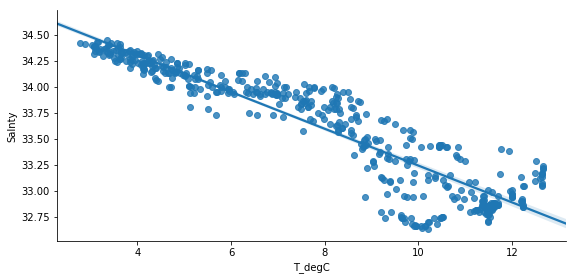

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import pydotplus
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

path = './DataSet/'
filename = 'bottle.csv'

filename_read = os.path.join(path,filename)
df = pd.read_csv(filename_read,na_values=['NA','?'])

df = df.dropna()

def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

# visualize the relationship
sb.pairplot(df, x_vars='T_degC', y_vars='Salnty', height=4, aspect=2, kind='reg')

Root mean squared error = 0.1250
R-squared = 0.8442


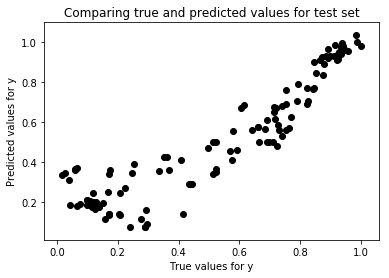

In [21]:
# Linear Regression
normalize_numeric_minmax(df, 'T_degC')
normalize_numeric_minmax(df, 'Salnty')
X = df[['T_degC']]
y = df[['Salnty']]
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

### a) Multiple Linear Regression

Slope =  -0.95964134
Intercept =  1.0339228


Text(0, 0.5, 'y')

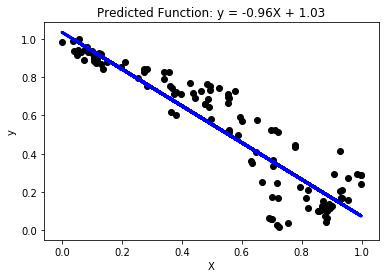

In [22]:
#Multiple Linear Regression
#Continues from Linear Regression

print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0]) ### Step 4: Postprocessing

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

# b) Regression

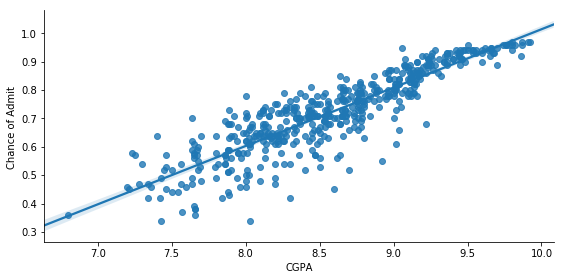

In [23]:
path = './DataSet/'
filename = 'Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv'

filename_read = os.path.join(path,filename)
df = pd.read_csv(filename_read,na_values=['NA','?'])

# visualize the relationship
sb.pairplot(df, x_vars='CGPA', y_vars='Chance of Admit ', height=4, aspect=2, kind='reg')

Root mean squared error = 0.1041
R-squared = 0.7772


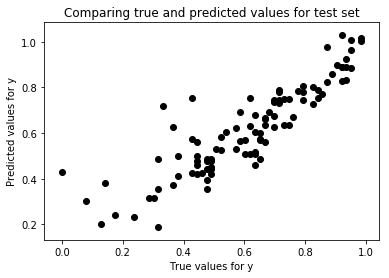

In [24]:
# Linear Regression
normalize_numeric_minmax(df, 'CGPA')
normalize_numeric_minmax(df, 'Chance of Admit ')
X = df[['CGPA']]
y = df[['Chance of Admit ']]
# train and split 80/20
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Root mean squared error = 0.1056
R-squared = 0.7789


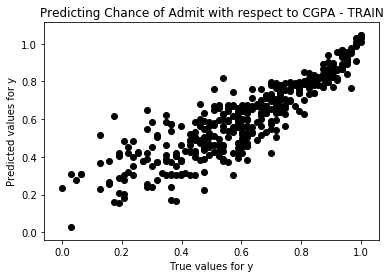

In [25]:
#Linear Regression performed on training data
y_pred = regr.predict(x_train)

plt.scatter(y_train, y_pred, color='black')
plt.title('Predicting Chance of Admit with respect to CGPA - TRAIN')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred)))
print('R-squared = %.4f' % r2_score(y_train, y_pred))

Root mean squared error = 0.1038
R-squared = 0.7784


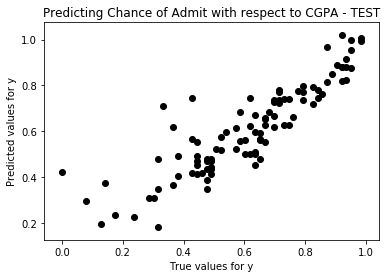

In [26]:
#Linear Regression performed on testData
regr.fit(x_test, y_test)
y_pred = regr.predict(x_test)

plt.scatter(y_test, y_pred, color='black')
plt.title('Predicting Chance of Admit with respect to CGPA - TEST')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

In [27]:
#Multiple Linear Regression
#Now that the rows data has been shuffled around, we can split it 80/20 
numInstances = 500
numTrain = 100   # In our data set, we have 500 rows. 100 rows is 20% of the data 
numTest = numInstances - numTrain

trainingData = df[:numTest]
testData = df[numTest:]

#Though testing, none of this happens until the normalization of the data
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

#Here, we are peforming normalization on two variables before utlizing regression
normalize_numeric_minmax(df, 'CGPA')
normalize_numeric_minmax(df, 'Chance of Admit ')

In [28]:
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [29]:
X,y=to_xy(df, 'Chance of Admit ')

numTrain = 20   # number of training instances
numTest = numInstances - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

#Now that the rows data has been shuffled around, we can split it 80/20 
numInstances = 500
numTrain = 100   # In our data set, we have 500 rows. 100 rows is 20% of the data 
numTest = numInstances - numTrain

trainingData = df[:numTest]
testData = df[numTest:]

Root mean squared error = 0.1044
R-squared = 0.7262


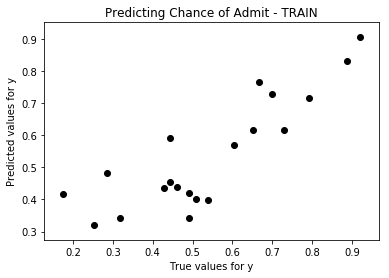

In [30]:
# Create linear regression object
regr = LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# apply model to training test
y_pred_test = regr.predict(X_train)
plt.scatter(y_train, y_pred_test, color='black')
plt.title('Predicting Chance of Admit - TRAIN')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_test))

Root mean squared error = 0.0899
R-squared = 0.8395


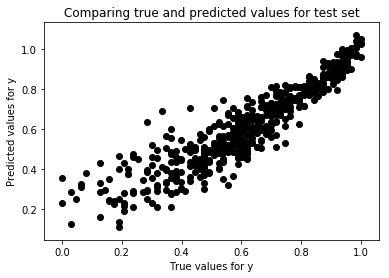

In [31]:
# Fit regression model to the test set
regr.fit(X_test, y_test)

# Apply model to the test set
y_pred_test = regr.predict(X_test)

# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

# b) Classification

In [32]:
# first we discretize the last column "Chance of Admit" into three classes
filename_read = os.path.join(path,filename)
df = pd.read_csv(filename_read,na_values=['NA','?'])
# shuffle the dataset
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

df.loc[(df['Chance of Admit '] > 0) & (df['Chance of Admit '] <= 0.33), 'Chance of Admit '] = -1
df.loc[(df['Chance of Admit '] > 0.33) & (df['Chance of Admit '] <= 0.66), 'Chance of Admit '] = -2
df.loc[(df['Chance of Admit '] > 0.66) & (df['Chance of Admit '] <= 1), 'Chance of Admit '] = -3
df['Chance of Admit '] = df['Chance of Admit '].replace([-1],'low')
df['Chance of Admit '] = df['Chance of Admit '].replace([-2],'mid')
df['Chance of Admit '] = df['Chance of Admit '].replace([-3],'high')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,173,322,110,4,4.0,5.0,9.13,1,high
1,377,297,96,2,2.5,2.0,7.43,0,mid
2,33,338,118,4,3.0,4.5,9.40,1,high
3,226,296,99,2,2.5,2.5,8.03,0,mid
4,392,318,106,3,2.0,3.0,8.65,0,high
5,146,320,113,2,2.0,2.5,8.64,1,high
6,138,316,100,2,1.5,3.0,8.16,1,high
7,195,316,109,3,3.5,3.0,8.76,0,high
8,242,317,103,2,2.5,2.0,8.15,0,mid
9,488,327,115,4,3.5,4.0,9.14,0,high


In [33]:
# split the data
numInstances = 500
numTrain = 100
numTest = numInstances - numTrain

trainingData = df[:numTest]
testData = df[numTest:]

# train with training data
Y = pd.DataFrame(trainingData, columns=['Chance of Admit '])
X = trainingData.drop(['Chance of Admit ', 'Serial No.'] ,axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

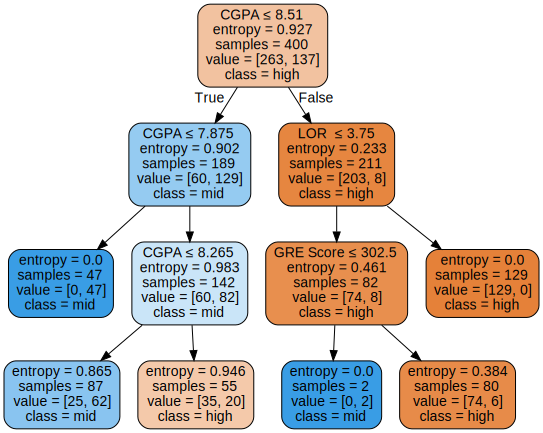

In [34]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['high','mid','low'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [35]:
testY = pd.DataFrame(testData, columns=['Chance of Admit '])
testX = testData.drop(['Serial No.','Chance of Admit '],axis=1)

predY = clf.predict(testX)
testData.reset_index(inplace=True, drop=True)
predictions = pd.concat([testData['Chance of Admit '],pd.Series(predY,name='Predicted Class')], axis=1)
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
predictions

Accuracy on test data is 0.81


,Chance of Admit,Predicted Class
0,high,mid
1,high,high
2,high,high
3,high,high
4,high,mid
5,mid,mid
6,mid,high
7,mid,mid
8,high,high
9,high,high
